#  Importing Modules, Reading the Dataset and Defining an Evaluation Table

In [71]:
# FOR NUMERICAL ANALYTICS
import numpy as np

# TO STORE AND PROCESS DATA IN DATAFRAME
import pandas as pd
import os

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# BASIC VISUALIZATION PACKAGE
import matplotlib.pyplot as plt

# ADVANCED PLOTING
import seaborn as seabornInstance 

# INTERACTIVE VISUALIZATION
import chart_studio.plotly as py 
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn import datasets, metrics,linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from discover_feature_relationships import discover



In [72]:
#2015 data
df_15 = pd.read_csv('2015.csv')
#df_15.describe()
#df_15.info()
usecols = ['Rank','Country','Score','GDP','Support',
                'Health','Freedom','Generosity','Corruption']
df_15.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True)
df_15.columns = ['Country','Rank','Score','Support',
                'GDP','Health',
                'Freedom','Generosity','Corruption']
df_15['Year'] = 2015 #add year column
df_15.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [73]:
#2016 data
df_16 = pd.read_csv('2016.csv')
df_16.drop(['Region','Lower Confidence Interval','Upper Confidence Interval',
            'Dystopia Residual'],axis=1,inplace=True)
df_16.columns = ['Country','Rank','Score','GDP',
                'Support','Health',
                'Freedom','Generosity','Corruption']
df_16['Year'] = 2016
df_16.head()

,Country,Rank,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [74]:
# 2017 data
df_17 = pd.read_csv('2017.csv')
df_17.drop(['Whisker.high','Whisker.low',
            'Dystopia.Residual'],axis=1,inplace=True)
df_17.columns = ['Country','Rank','Score','GDP',
                'Support','Health',
                'Freedom','Generosity','Corruption']
df_17['Year'] = 2017

df_17.head()

,Country,Rank,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [75]:
#2018 data
df_18 = pd.read_csv('2018.csv')
df_18.columns = ['Rank','Country','Score','GDP',
                'Support','Health',
                'Freedom','Generosity','Corruption']
df_18['Year'] = 2018
df_18.head()


,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [76]:
#2019 data
df_19 = pd.read_csv('2019.csv')
df_19.columns = ['Rank','Country','Score','GDP',
                'Support','Health',
                'Freedom','Generosity','Corruption']

df_19['Year'] = 2019
df_19.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [77]:
target = ['Top','Top-Mid', 'Low-Mid', 'Low' ]
target_n = [4, 3, 2, 1]


df_15["target"] = pd.qcut(df_15['Rank'], len(target), labels=target)
df_15["target_n"] = pd.qcut(df_15['Rank'], len(target), labels=target_n)

df_16["target"] = pd.qcut(df_16['Rank'], len(target), labels=target)
df_16["target_n"] = pd.qcut(df_16['Rank'], len(target), labels=target_n)

df_17["target"] = pd.qcut(df_17['Rank'], len(target), labels=target)
df_17["target_n"] = pd.qcut(df_17['Rank'], len(target), labels=target_n)

df_18["target"] = pd.qcut(df_18['Rank'], len(target), labels=target)
df_18["target_n"] = pd.qcut(df_18['Rank'], len(target), labels=target_n)

df_19["target"] = pd.qcut(df_19['Rank'], len(target), labels=target)
df_19["target_n"] = pd.qcut(df_19['Rank'], len(target), labels=target_n)


In [78]:
# APPENDING ALL TOGUETHER
finaldf = df_15.append([df_16,df_17,df_18,df_19])
# finaldf.dropna(inplace = True)

#CHECKING FOR MISSING DATA
finaldf.isnull().any()

# FILLING MISSING VALUES OF CORRUPTION PERCEPTION WITH ITS MEAN
finaldf.Corruption.fillna((finaldf.Corruption.mean()), inplace = True)
finaldf.head(10)


,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year,target,target_n
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Top,4
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Top,4
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Top,4
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Top,4
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,Top,4
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015,Top,4
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015,Top,4
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015,Top,4
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015,Top,4
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015,Top,4


In [79]:
finaldf.to_csv('data.csv',index=False) # Write to a CSV file

In [80]:
finaldf.describe()

,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,1.049114,0.945326,0.612416,0.411091,0.178526,0.165536,2016.993606
std,45.182384,1.127456,0.367244,0.384008,0.248309,0.152880,0.119115,0.127329,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.814218,0.688370,0.440183,0.309768,0.084860,0.067921,2016.000000
50%,79.000000,5.322000,1.109075,1.003340,0.647310,0.431000,0.155219,0.128445,2017.000000
75%,118.000000,6.189500,1.337622,1.237970,0.808000,0.531000,0.246864,0.236908,2018.000000
max,158.000000,7.769000,1.690420,2.096000,1.141000,0.724000,0.838075,0.819710,2019.000000


In [81]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })
seabornInstance.set_style(style='whitegrid')

# Defining a Function to Calculate the Adjusted  R2

In [82]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

Text(0.5, 1.0, 'Distribution of Happiness Score')

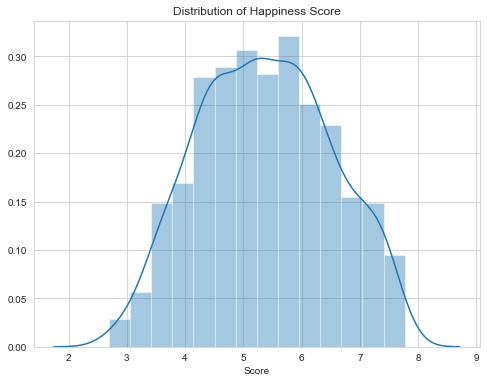

In [83]:
fig = plt.figure(figsize=(8,6))
seabornInstance.distplot(finaldf['Score'])
plt.title('Distribution of Happiness Score')

# Simple Linear Regression

# GDP per capita

In [84]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['GDP'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)

X_test = np.array(test_data['GDP'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)

pred = lr.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,finaldf[['GDP']],finaldf['Score'],cv=5).mean(),'.3f'))

print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation


Average Score for Test Data: 5.388
Intercept: 3.2686846459032672
Coefficient: [2.23716097]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression,-,0.722,0.6,-,0.617,-,0.597


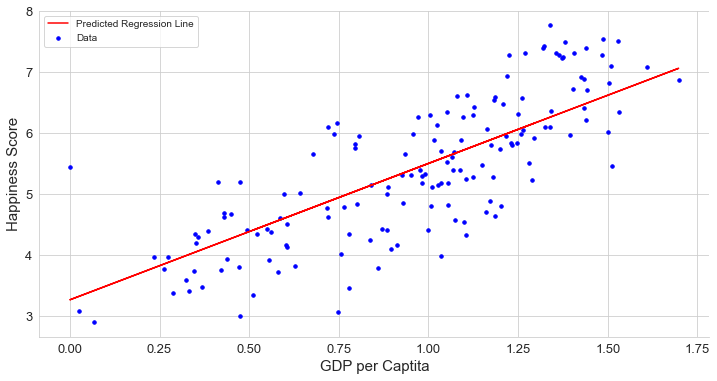

In [85]:
# Plot
seabornInstance.set_style(style='whitegrid')

plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("GDP per Captita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


In [86]:
'''Happiness score vs gdp per capital'''
px.scatter(finaldf, x="GDP", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")

# Support 

In [ ]:
'''Happiness score vs social support'''
px.scatter(finaldf, x="Support", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")
           

In [ ]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Support'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)

X_test = np.array(test_data['Support'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)

pred = lr.predict(X_test)

# Plot
seabornInstance.set_style(style='whitegrid')

plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Social Support", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Healthy life expectancy

In [ ]:
'''Happiness score vs healthy life expectancy'''
px.scatter(finaldf, x="Health", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")

In [ ]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Health'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)

X_test = np.array(test_data['Health'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)

pred = lr.predict(X_test)

# Plot
seabornInstance.set_style(style='whitegrid')

plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Healthy life expectancy", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Freedom to make life choices

In [ ]:
'''Happiness score vs Freedom to make life choices'''
px.scatter(finaldf, x="Freedom", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")

In [ ]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Freedom'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)

X_test = np.array(test_data['Freedom'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)

pred = lr.predict(X_test)

# Plot
seabornInstance.set_style(style='whitegrid')

plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Freedom to make life choices", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Generosity

In [ ]:
'''Happiness score vs Generosity'''
px.scatter(finaldf, x="Generosity", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")

In [ ]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Generosity'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)

X_test = np.array(test_data['Generosity'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)

pred = lr.predict(X_test)

# Plot
seabornInstance.set_style(style='whitegrid')

plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Generosity", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Perceptions of corruption

In [ ]:
'''Happiness score vs Corruption'''
px.scatter(finaldf, x="Corruption", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")

In [ ]:
fig = plt.figure(figsize=(8,6))
seabornInstance.distplot(finaldf['Corruption'])
plt.title('Distribution of Corruption')

In [ ]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Corruption'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)

X_test = np.array(test_data['Corruption'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)

pred = lr.predict(X_test)

# Plot
seabornInstance.set_style(style='whitegrid')

plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Corruption", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Visualizing and Examining Data

In [ ]:
# DISTRIBUTION OF ALL NUMERIC DATA
plt.rcParams['figure.figsize'] = (15, 15)
df1 = finaldf[['GDP', 'Health', 'Freedom',
              'Generosity','Corruption', 'Support']]


h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10')
seabornInstance.despine(left = True, bottom = True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];



In [ ]:
'''World Map
Happiness Rank Accross the World'''

happiness_rank = dict(type = 'choropleth', 
           locations = finaldf['Country'],
           locationmode = 'country names',
           z = finaldf['Rank'], 
           text = finaldf['Country'],
           colorscale = 'Blues',
           autocolorscale=False,
           reversescale=True,
           marker_line_color='darkgray',
           marker_line_width=0.5)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
world_map_1 = go.Figure(data = [happiness_rank], layout=layout)
iplot(world_map_1)

In [ ]:
world_map_1.write_html("1.html")

In [ ]:
'''World Map 
Happiness Score Accross the world'''
happiness_score= dict(type = 'choropleth', 
           locations = finaldf['Country'],
           locationmode = 'country names',
           z = finaldf['Score'], 
           text = finaldf['Country'],
           colorscale = 'PuBu',
           autocolorscale=False,
           reversescale=True,
           marker_line_color='darkgray',
           marker_line_width=0.5)
layout = dict(title = 'Happiness Score Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
world_map_2 = go.Figure(data = [happiness_score], layout=layout)
iplot(world_map_2)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))

seabornInstance.barplot(x='GDP',y='Country',
                        data=finaldf.nlargest(10,'GDP'),
                        ax=axes[0,0],palette="Blues_r")
seabornInstance.barplot(x='Health' ,y='Country',
                        data=finaldf.nlargest(10,'Health'),
                        ax=axes[0,1],palette='Blues_r')
seabornInstance.barplot(x='Score' ,y='Country',
                        data=finaldf.nlargest(10,'Score'),
                        ax=axes[1,0],palette='Blues_r')
seabornInstance.barplot(x='Generosity' ,y='Country',
                        data=finaldf.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
seabornInstance.barplot(x='Freedom' ,y='Country',
                        data=finaldf.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
seabornInstance.barplot(x='Corruption' ,y='Country',
                        data=finaldf.nlargest(10,'Corruption'),
                        ax=axes[2,1],palette='Blues_r')

# Correlation Among variables

In [ ]:
mask = np.zeros_like(finaldf[usecols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

seabornInstance.heatmap(finaldf[usecols].corr(),
                        linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
drop_features = finaldf.drop(['Rank','Year', 'target_n'], axis = 1)
seabornInstance.pairplot(drop_features, hue='target')

In [ ]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(finaldf,train_size = 0.8,random_state=3)

independent_var = ['GDP','Health','Freedom','Support','Generosity','Corruption']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['Score'])



print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
      '+',np.round(complex_model_1.coef_[0],4),'∗ Support',
      '+',np.round(complex_model_1.coef_[1],4),'* GDP', 
      '+',np.round(complex_model_1.coef_[2],4),'* Health',
      '+',np.round(complex_model_1.coef_[3],4),'* Freedom',
       '+',np.round(complex_model_1.coef_[4],4),'* Generosity',
      '+',np.round(complex_model_1.coef_[5],4),'* Corrption')

pred = complex_model_1.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(
                       test_data_dm['Score'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(
                        train_data_dm[independent_var],
                        train_data_dm['Score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(
                            train_data_dm[independent_var],
                            train_data_dm['Score']),
                            train_data_dm.shape[0],
                            len(independent_var)),'.3f'))
rtecm = float(format(complex_model_1.score(
                        test_data_dm[independent_var],
                        test_data_dm['Score']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(
                        test_data_dm[independent_var],test_data['Score']),
                        test_data_dm.shape[0],
                        len(independent_var)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,
                    finaldf[independent_var],
                    finaldf['Score'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-1','all features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)



In [ ]:
# MULTIPLE LINEAR REGRESSION 2
train_data_dm,test_data_dm = train_test_split(finaldf,train_size = 0.8,random_state=3)

independent_var = ['GDP','Health','Support']
complex_model_2 = LinearRegression()
complex_model_2.fit(train_data_dm[independent_var],train_data_dm['Score'])



print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))
print('Happiness score = ',np.round(complex_model_2.intercept_,4),
      '+',np.round(complex_model_2.coef_[0],4),'∗ Support',
      '+',np.round(complex_model_2.coef_[1],4),'* GDP', 
      '+',np.round(complex_model_2.coef_[2],4),'* Health')

pred = complex_model_2.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(
                       test_data_dm['Score'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(
                        train_data_dm[independent_var],
                        train_data_dm['Score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(
                            train_data_dm[independent_var],
                            train_data_dm['Score']),
                            train_data_dm.shape[0],
                            len(independent_var)),'.3f'))
rtecm = float(format(complex_model_2.score(
                        test_data_dm[independent_var],
                        test_data_dm['Score']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(
                        test_data_dm[independent_var],test_data['Score']),
                        test_data_dm.shape[0],
                        len(independent_var)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,
                    finaldf[independent_var],
                    finaldf['Score'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


In [ ]:
X = finaldf[[ 'GDP', 'Health', 'Support','Freedom','Generosity','Corruption']]
y = finaldf['Score']

'''
 This function takes the features as input and
 returns the normalized values, the mean, as well 
 as the standard deviation for each feature. 
 '''
def featureNormalize(X):
    mu = np.mean(X) ## Define the mean
    sigma = np.std(X) ## Define the standard deviation.
    X_norm = (X - mu)/sigma ## Scaling function.
    return X_norm, mu, sigma 

m = len(y) ## length of the training data
X = np.hstack((np.ones([m,1]), X)) ## Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) ## reshape y to mx1 array
theta = np.zeros([7,1]) ## Initialize theta (the coefficient) to a 3x1 zero vector.

''' 
 This function takes in the values for 
 the training set as well as initial values 
 of theta and returns the cost(J).
 '''  

def cost_function(X,y, theta):
    h = X.dot(theta) ## The hypothesis
    J = 1/(2*m)*(np.sum((h-y)**2)) ## Implementing the cost function
    return J

In [ ]:
  '''
    This function takes in the values of the set, 
    as well the intial theta values(coefficients), the 
    learning rate, and the number of iterations. The output 
    will be the a new set of coefficeients(theta), optimized 
    for making predictions, as well as the array of the cost 
    as it depreciates on each iteration.
    '''

num_iters = 2000 ## Initialize the iteration parameter.
alpha = 0.01 ## Initialize the learning rate.
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
        J_history.append(cost_function(X, y, theta)) ## Append the cost to the J_history array
    return theta, J_history
theta , J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# print(theta)
# print(J_history)


In [ ]:
print('Happiness score = ',np.round(theta[0],4),
        '+',np.round(theta[1],4),'∗ Support',
      '+',np.round(theta[2],4),'* GDP', 
      '+',np.round(theta[3],4),'* Health',
      '+',np.round(theta[4],4),'* Freedom',
       '+',np.round(theta[5],4),'* Generosity',
      '+',np.round(theta[6],4),'* Corrption')

In [ ]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0])*sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost


In [ ]:
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[independent_var],train_data_dm['Score'])

pred1 = complex_model_L.predict(test_data_dm[independent_var])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Score'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[independent_var],train_data_dm['Score']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[independent_var],train_data_dm['Score']),train_data_dm.shape[0],len(independent_var)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[independent_var],test_data_dm['Score']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[independent_var],test_data_dm['Score']),test_data_dm.shape[0],len(independent_var)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,finaldf[independent_var],finaldf['Score'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=0.0001)
complex_model_L.fit(train_data_dm[independent_var],train_data_dm['Score'])

pred2 = complex_model_L.predict(test_data_dm[independent_var])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Score'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[independent_var],train_data_dm['Score']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[independent_var],train_data_dm['Score']),train_data_dm.shape[0],len(independent_var)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[independent_var],test_data_dm['Score']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[independent_var],test_data_dm['Score']),test_data_dm.shape[0],len(independent_var)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,finaldf[independent_var],finaldf['Score'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=0.03)
complex_model_L.fit(train_data_dm[independent_var],train_data_dm['Score'])

pred3 = complex_model_L.predict(test_data_dm[independent_var])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Score'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[independent_var],train_data_dm['Score']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[independent_var],train_data_dm['Score']),train_data_dm.shape[0],len(independent_var)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[independent_var],test_data_dm['Score']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[independent_var],test_data_dm['Score']),test_data_dm.shape[0],len(independent_var)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,finaldf[independent_var],finaldf['Score'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

In [ ]:
finaldf.loc[finaldf['Country']=='Vietnam']

In [ ]:
finaldf.loc[finaldf['Country']=='United States']

In [ ]:
# COMPARING BIGGEST ECONOMIES IN THE WORLD

top_economies = ['United States', 'China','Japan', 'Germany','United Kingdom','India', 'France','Brazil', 'Canada']

df_top = finaldf[(finaldf['Country'].isin(top_economies))].sort_values(['Country', 'Year'])
df_top.reset_index(drop=True)

In [ ]:
# visualize hidden relationships in data
classifier_overrides = set()
df_results = discover.discover(finaldf.drop(['target', 'target_n'],axis=1).sample(frac=1),
                               classifier_overrides)

In [ ]:

fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
seabornInstance.heatmap(df_results.pivot(index = 'target', 
                             columns = 'feature', 
                             values = 'score').fillna(1).loc[finaldf.drop(
                            ['target', 'target_n'],axis = 1).columns,finaldf.drop(
                            ['target', 'target_n'],axis = 1).columns],
                            annot=True, center = 0, ax = ax[0], vmin = -1, vmax = 1, cmap = "Blues")
seabornInstance.heatmap(df_results.pivot(index = 'target', 
                             columns = 'feature', 
                             values = 'score').fillna(1).loc[finaldf.drop(
                             ['target', 'target_n'],axis=1).columns,finaldf.drop(
                             ['target', 'target_n'],axis=1).columns],
                             annot=True, center=0, ax=ax[1], vmin=-0.25, vmax=1, cmap="Blues_r")
plt.plot()

In [ ]:
# LET'S TAKE A SECOND LOOK INTO CORRELATIONS
df_clean = finaldf.drop(["Rank", 'target', 'target_n', 'Year'], axis=1)
df_model = df_clean.drop(['Country'], axis = 1)
df_model

In [ ]:
# MULTIPLE LR
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()